In [158]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
class RandomAction:
    def __init__(self, n_states=19, left_reward=-1):
        self.n_states = n_states
        self.left_reward = left_reward
        self.reset()

    def reset(self):
        self.state = self.n_states // 2
        return self.state

    def step(self):
        action = np.random.choice([-1, 1])
        self.state += action
        if self.state < 0:
            return self.state, self.left_reward, True
        elif self.state >= self.n_states:
            return self.state, 1, True
        return self.state, 0, False

In [180]:
class n_TD:
    def __init__(self, n, alpha, V_init=0., do=False, left_reward=-1, n_states=19):
        self.n = n
        self.alpha = alpha
        self.V = np.zeros(n_states) + V_init
        self.left_reward = left_reward
        self.n_states = n_states
        self.gamma = 1
        if do:
            self.do()
    
    def do(self):
        env = RandomAction(left_reward=self.left_reward, n_states=self.n_states)
        episodes = 10

        for episode in range(episodes):
            states = []
            rewards = []
            state = env.reset()
            states.append(state)

            t = 0
            T = 100000
            while True:
                if t < T:
                    state, reward, done = env.step()
                    states.append(state)
                    rewards.append(reward)
                    if done:
                        T = t + 1
                tau = t - self.n + 1
                if tau >= 0:
                    G = sum([self.gamma ** (i-tau) * rewards[i] for i in range(tau, min(tau+self.n, T))])
                    if tau + self.n < T:
                        G += self.gamma ** self.n * self.V[states[tau + self.n]]
                    self.V[states[tau]] += self.alpha * (G - self.V[states[tau]])
                if tau == T - 1:
                    break
                t += 1

In [161]:
def RMS_RA(V):
    V = np.array(V)
    return np.sqrt(np.mean((V - np.linspace(-1, 1, 21)[1:-1])**2))

In [162]:
table = []

alphas = np.linspace(0, 1, 51)
n_s = [1, 2, 4, 8, 16, 32, 64, 128, 256]

for alpha in alphas:
    table_ = []
    for n in n_s:
        TDs = [n_TD(n, alpha, do=True) for _ in range(100)]
        TD_RMS = [RMS_RA(td.V) for td in TDs]

        table_.append(np.mean(TD_RMS, axis=0))
    table.append(table_)

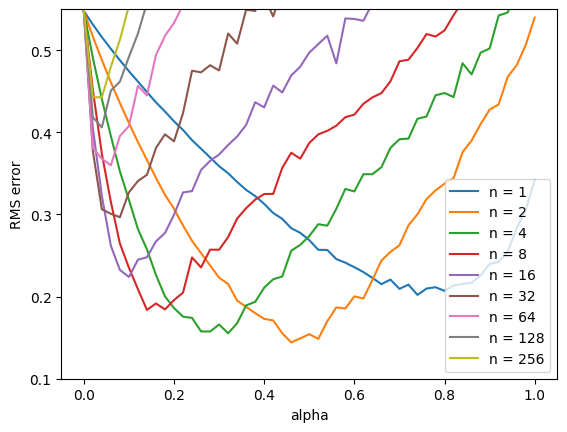

In [170]:
table = np.array(table)

for i in range(len(n_s)):
    plt.plot(alphas, table[:, i], label=f'n = {n_s[i]}')

plt.xlabel('alpha')
plt.ylabel('RMS error')
plt.legend()
plt.ylim([0.1, 0.55])
plt.show()

---

In [187]:
def RMS_RA(V):
    V = np.array(V)
    return np.sqrt(np.mean((V - np.linspace(0, 1, 21)[1:-1])**2))

In [188]:
table2 = []

alphas = np.linspace(0, 1, 51)
n_s = [1, 2, 4, 8, 16, 32, 64, 128, 256]

for alpha in alphas:
    table_ = []
    for n in n_s:
        TDs = [n_TD(n, alpha, left_reward=0, V_init=0.5, do=True) for _ in range(100)]
        TD_RMS = [RMS_RA(td.V) for td in TDs]

        table_.append(np.mean(TD_RMS, axis=0))
    table2.append(table_)

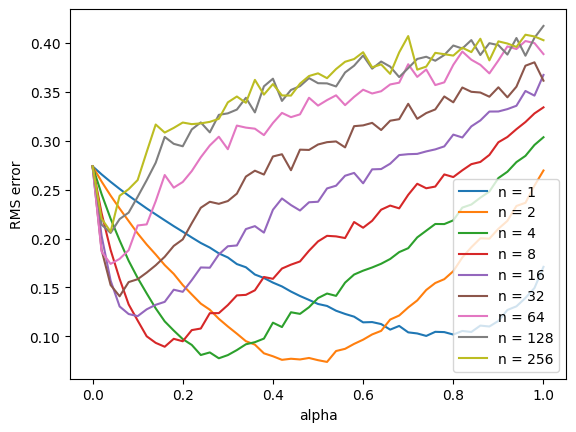

In [189]:
table2 = np.array(table2)

for i in range(len(n_s)):
    plt.plot(alphas, table2[:, i], label=f'n = {n_s[i]}')

plt.xlabel('alpha')
plt.ylabel('RMS error')
plt.legend()
plt.show()

---

In [181]:
def RMS_RA(V):
    V = np.array(V)
    return np.sqrt(np.mean((V - np.linspace(-1, 1, 7)[1:-1])**2))

In [182]:
table3 = []

alphas = np.linspace(0, 1, 51)
n_s = [1, 2, 4, 8, 16, 32, 64, 128, 256]

for alpha in alphas:
    table_ = []
    for n in n_s:
        TDs = [n_TD(n, alpha, n_states=5, do=True) for _ in range(100)]
        TD_RMS = [RMS_RA(td.V) for td in TDs]

        table_.append(np.mean(TD_RMS, axis=0))
    table3.append(table_)

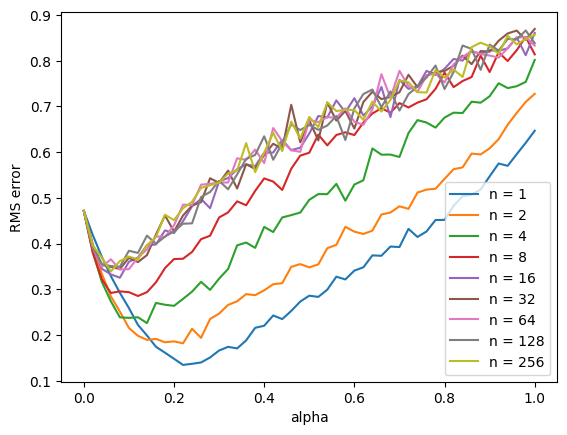

In [183]:
table3 = np.array(table3)

for i in range(len(n_s)):
    plt.plot(alphas, table3[:, i], label=f'n = {n_s[i]}')

plt.xlabel('alpha')
plt.ylabel('RMS error')
plt.legend()
plt.show()